In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
df=pd.read_csv(r'C:\Users\RAHUL\Desktop\ML PRACTIS PROJECT\Thyroid Disease Detection\hypothyroid.csv',na_values='?')

In [43]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,P
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,P
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,P
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,P
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,P


In [44]:
df.isna().sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3771.0,51.735879,20.084958,1.000,36.00,54.00,67.00,455.00
TSH,3403.0,5.086766,24.521470,0.005,0.50,1.40,2.70,530.00
T3,3003.0,2.013500,0.827434,0.050,1.60,2.00,2.40,10.60
TT4,3541.0,108.319345,35.604248,2.000,88.00,103.00,124.00,430.00
T4U,3385.0,0.995000,0.195457,0.250,0.88,0.98,1.08,2.32
FTI,3387.0,110.469649,33.089698,2.000,93.00,107.00,124.00,395.00
TBG,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [47]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')

In [48]:
df.drop('referral source',axis=1,inplace=True)

In [49]:
df.drop('TBG',axis=1,inplace=True)

In [50]:
df['binaryClass'].value_counts()

P    3481
N     291
Name: binaryClass, dtype: int64

In [51]:
df['binaryClass']=df['binaryClass'].map({"P":0,"N":1})

In [52]:
df['pregnant'].value_counts()

f    3719
t      53
Name: pregnant, dtype: int64

In [53]:
df.replace({'f':1,'t':0})

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,41.0,F,1,1,1,1,1,1,1,1,...,0,2.5,0,125.0,0,1.14,0,109.0,1,0
1,23.0,F,1,1,1,1,1,1,1,1,...,0,2.0,0,102.0,1,NaN,1,NaN,1,0
2,46.0,M,1,1,1,1,1,1,1,1,...,1,NaN,0,109.0,0,0.91,0,120.0,1,0
3,70.0,F,0,1,1,1,1,1,1,1,...,0,1.9,0,175.0,1,NaN,1,NaN,1,0
4,70.0,F,1,1,1,1,1,1,1,1,...,0,1.2,0,61.0,0,0.87,0,70.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,F,1,1,1,1,1,1,1,1,...,1,NaN,1,NaN,1,NaN,1,NaN,1,0
3768,68.0,F,1,1,1,1,1,1,1,1,...,0,2.1,0,124.0,0,1.08,0,114.0,1,0
3769,74.0,F,1,1,1,1,1,1,1,1,...,0,1.8,0,112.0,0,1.07,0,105.0,1,0
3770,72.0,M,1,1,1,1,1,1,1,1,...,0,2.0,0,82.0,0,0.94,0,87.0,1,0


In [54]:
df['sex'].value_counts()

F    2480
M    1142
Name: sex, dtype: int64

In [55]:
df=df.replace({'F':0,'M':1})

In [56]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,41.0,0.0,f,f,f,f,f,f,f,f,...,t,2.5,t,125.0,t,1.14,t,109.0,f,0
1,23.0,0.0,f,f,f,f,f,f,f,f,...,t,2.0,t,102.0,f,NaN,f,NaN,f,0
2,46.0,1.0,f,f,f,f,f,f,f,f,...,f,NaN,t,109.0,t,0.91,t,120.0,f,0
3,70.0,0.0,t,f,f,f,f,f,f,f,...,t,1.9,t,175.0,f,NaN,f,NaN,f,0
4,70.0,0.0,f,f,f,f,f,f,f,f,...,t,1.2,t,61.0,t,0.87,t,70.0,f,0


In [58]:
df['on thyroxine'].value_counts()

f    3308
t     464
Name: on thyroxine, dtype: int64

In [59]:
df=df.replace({'f':0,'t':1})

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   float64
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

In [62]:
df.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
b

In [67]:
df['sex'].fillna(df['sex'].mean(),inplace=True)

In [81]:
df['age'].fillna(df['sex'].mean(),inplace=True)

In [83]:
df['TSH'].fillna(df['TSH'].mean(),inplace=True)

In [91]:
df.isna().sum()

age                            0
sex                            0
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                            0
T3 measured                    0
T3                             0
TT4 measured                   0
TT4                            0
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
binaryClass                    0
dtype: int64

In [85]:
from sklearn.impute import SimpleImputer

In [87]:
imputer=SimpleImputer(strategy='mean')

In [88]:
df['T3']=imputer.fit_transform(df[['T3']])

In [90]:
df['TT4']=imputer.fit_transform(df[['TT4']])

In [92]:
df['T4U']=imputer.fit_transform(df[['T4U']])

In [93]:
df['FTI']=imputer.fit_transform(df[['FTI']])

In [94]:
df.isna().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
binaryClass                  0
dtype: int64

In [95]:

sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)

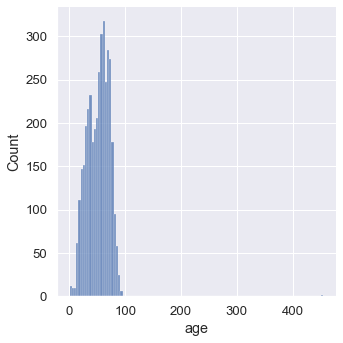

In [96]:
sns.displot(df['age'])

C:\Users\RAHUL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sex', ylabel='Density'>

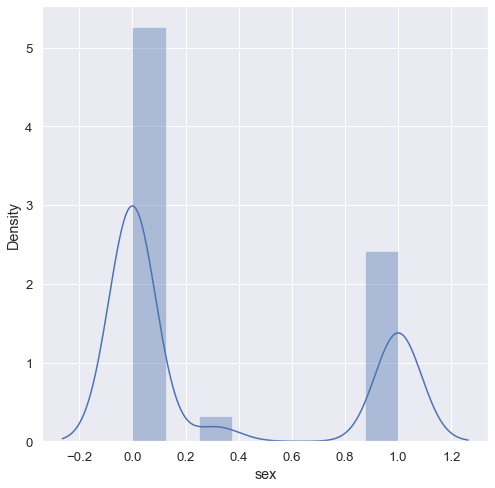

In [97]:
sns.distplot(df['sex'])

C:\Users\RAHUL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='T3', ylabel='Density'>

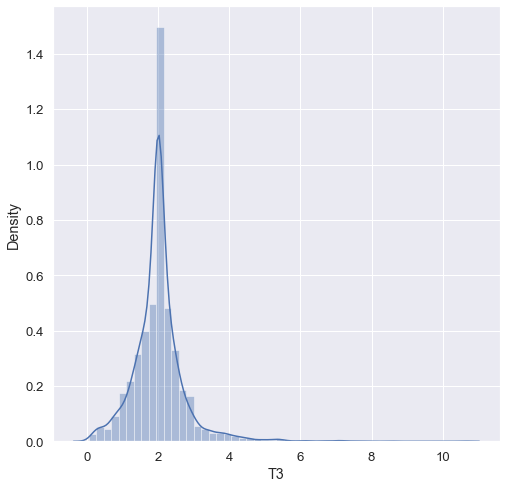

In [98]:
sns.distplot(df['T3'])

C:\Users\RAHUL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TT4', ylabel='Density'>

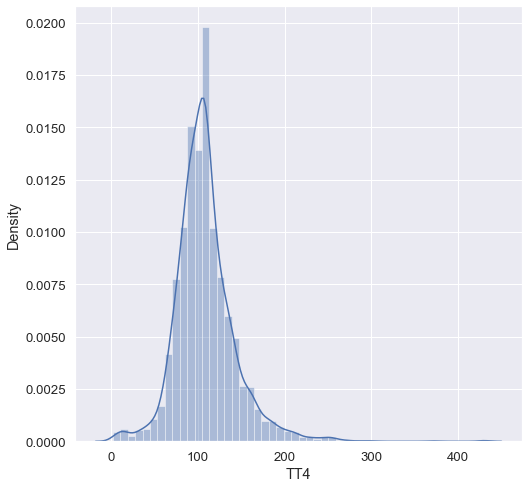

In [99]:
sns.distplot(df['TT4'])

C:\Users\RAHUL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FTI', ylabel='Density'>

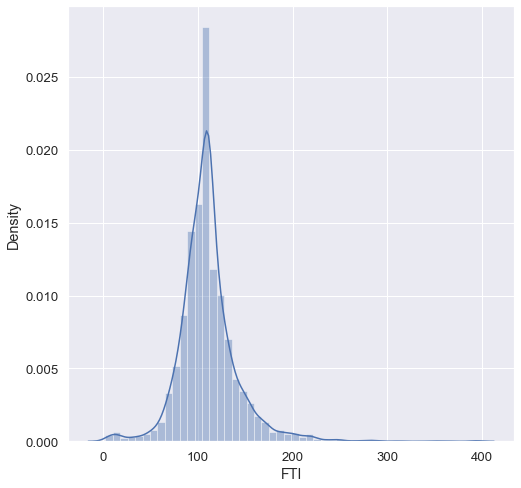

In [100]:
sns.distplot(df['FTI'])

C:\Users\RAHUL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAHUL\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


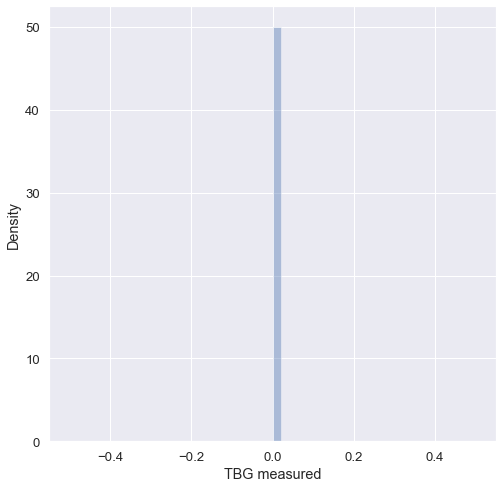

In [101]:
sns.distplot(df['TBG measured']);

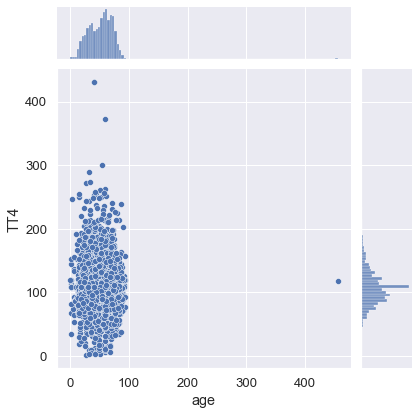

In [102]:
sns.jointplot(x='age',y='TT4',data=df,kind='scatter')

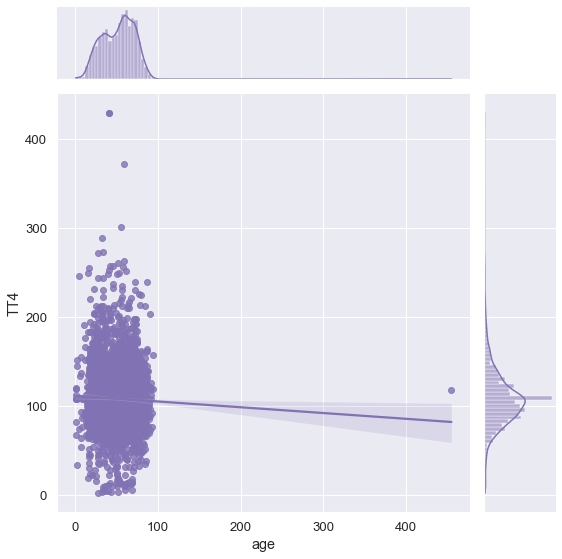

In [103]:
sns.jointplot(x='age', y='TT4', data=df, kind='reg', height=8, color='m')

C:\Users\RAHUL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

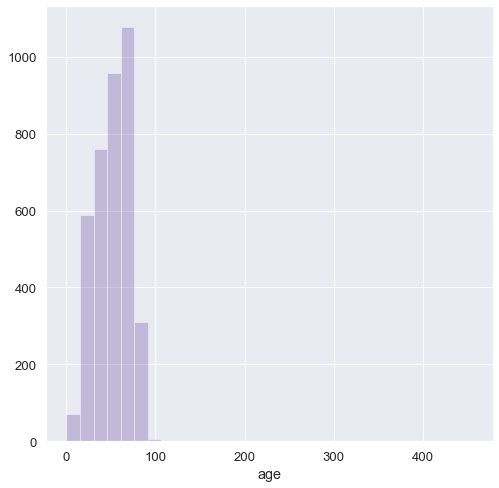

In [104]:
sns.distplot(df['age'],kde=False,bins=30,color='m')

<AxesSubplot:xlabel='binaryClass', ylabel='count'>

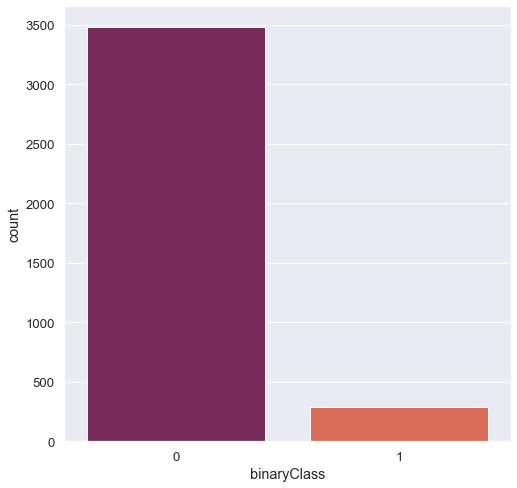

In [105]:
sns.countplot(x='binaryClass', data=df, palette='rocket')

<AxesSubplot:xlabel='binaryClass', ylabel='count'>

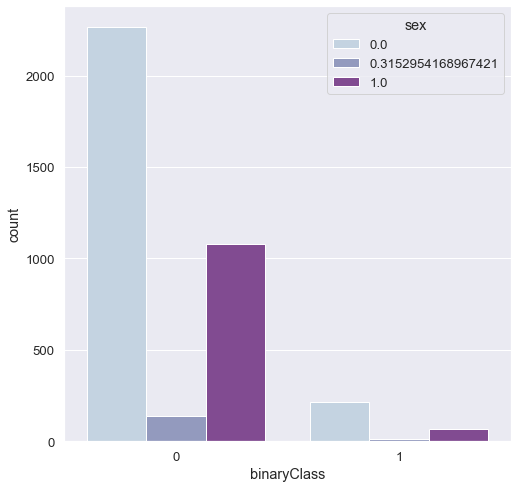

In [106]:
sns.countplot(x='binaryClass', data=df,hue='sex', palette='BuPu')

<AxesSubplot:xlabel='binaryClass', ylabel='age'>

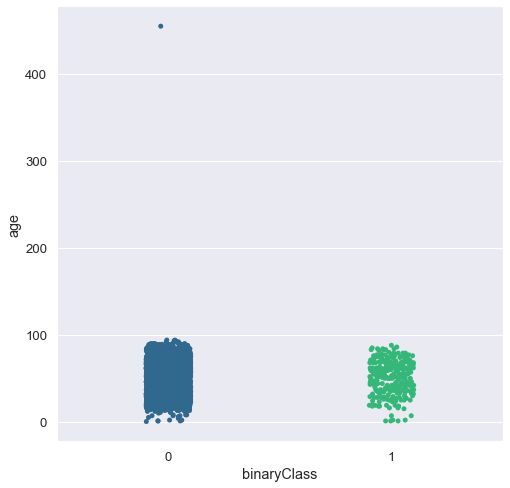

In [109]:
sns.stripplot(x="binaryClass", y="age", data=df, palette="viridis")


<AxesSubplot:xlabel='binaryClass', ylabel='age'>

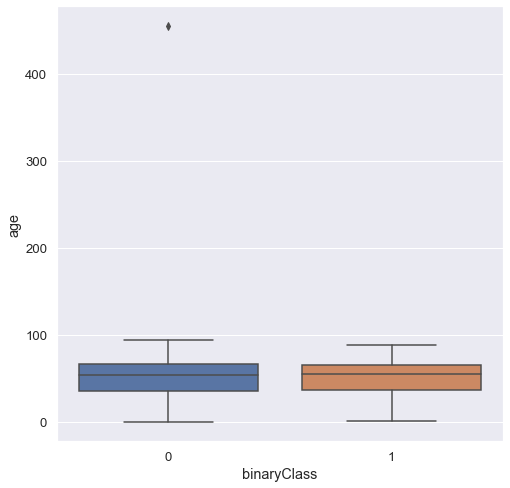

In [110]:
sns.boxplot(x='binaryClass',y='age',data=df)

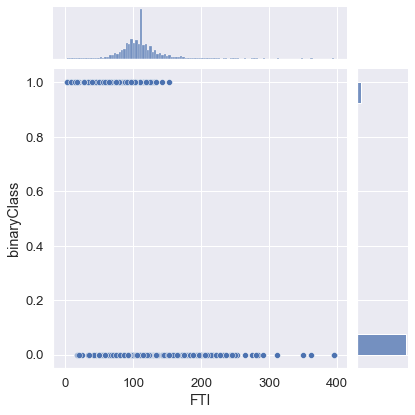

In [112]:
sns.jointplot(x='FTI',y='binaryClass',kind='scatter',data=df);


In [114]:
df_corr=df.corr()
df_corr

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
age,1.000000,-0.003133,0.012739,-0.017776,-0.063753,0.079536,-0.113341,-0.029395,0.047277,0.039702,...,7.270413e-02,-2.142663e-01,6.727713e-02,-3.780655e-02,8.505783e-02,-1.567450e-01,8.423171e-02,4.920534e-02,NaN,-0.002975
sex,-0.003133,1.000000,-0.098510,0.043533,-0.030484,0.005755,-0.079550,-0.036586,-0.020372,-0.046353,...,7.500437e-02,-6.275929e-02,7.387180e-02,-1.669887e-01,4.934307e-02,-2.255718e-01,5.016697e-02,-3.853089e-02,NaN,-0.050808
on thyroxine,0.012739,-0.098510,1.000000,0.005995,-0.002201,-0.042053,0.010152,0.037583,0.063373,0.094412,...,-1.450614e-01,6.484854e-03,2.496392e-02,2.128008e-01,3.885187e-02,4.636815e-02,3.828521e-02,1.857484e-01,NaN,-0.081060
query on thyroxine,-0.017776,0.043533,0.005995,1.000000,-0.012446,0.012594,0.045247,0.005858,-0.014610,-0.029808,...,-3.340948e-02,-6.465900e-03,2.960328e-02,-4.702231e-03,3.155031e-02,4.384229e-04,3.141982e-02,-3.550040e-03,NaN,-0.007448
on antithyroid medication,-0.063753,-0.030484,-0.002201,-0.012446,1.000000,-0.021624,0.072050,-0.012819,0.006589,-0.017264,...,1.094961e-02,7.921225e-02,-2.464939e-02,2.381055e-02,-2.953201e-02,6.036462e-02,-2.978795e-02,-1.660334e-02,NaN,-0.021689
sick,0.079536,0.005755,-0.042053,0.012594,-0.021624,1.000000,-0.024040,-0.000762,-0.025384,0.027718,...,6.695144e-03,-7.647155e-02,-5.699708e-03,-3.700575e-02,9.399140e-03,-3.906941e-02,9.068046e-03,-2.118940e-02,NaN,-0.001749
pregnant,-0.113341,-0.079550,0.010152,0.045247,0.072050,-0.024040,1.000000,-0.014251,-0.015048,-0.021364,...,2.686496e-02,1.811466e-01,2.109671e-02,1.724903e-01,3.294152e-02,3.347023e-01,3.280814e-02,-1.669842e-02,NaN,-0.034516
thyroid surgery,-0.029395,-0.036586,0.037583,0.005858,-0.012819,-0.000762,-0.014251,1.000000,0.003104,-0.012026,...,-2.345292e-02,-2.414553e-02,3.049073e-02,-2.180623e-02,1.067220e-02,2.792243e-02,1.048764e-02,-3.182840e-02,NaN,-0.017633
I131 treatment,0.047277,-0.020372,0.063373,-0.014610,0.006589,-0.025384,-0.015048,0.003104,1.000000,0.047296,...,1.504369e-04,1.205665e-02,3.219634e-02,-8.848056e-03,2.854012e-02,9.405826e-03,2.838493e-02,-1.681719e-02,NaN,0.003590
query hypothyroid,0.039702,-0.046353,0.094412,-0.029808,-0.017264,0.027718,-0.021364,-0.012026,0.047296,1.000000,...,-6.354673e-02,-4.749603e-02,2.443261e-02,-9.012716e-03,1.451686e-02,1.383247e-02,1.409980e-02,-1.971919e-02,NaN,0.086282


<AxesSubplot:>

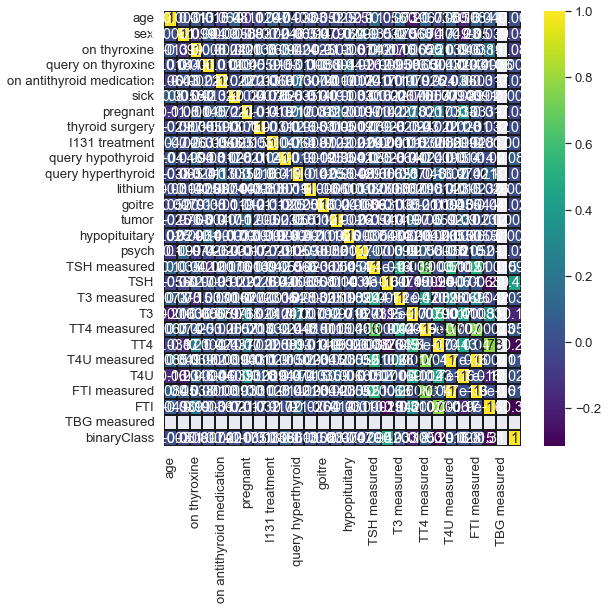

In [115]:
sns.heatmap(df_corr,cmap='viridis',linecolor='k',linewidths=2,annot=True)

In [116]:
x=df.drop('binaryClass',axis=1)
y=df['binaryClass']

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)

In [119]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3017, 27), (755, 27), (3017,), (755,))

In [121]:
from sklearn.preprocessing import StandardScaler

In [122]:
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping

In [124]:
model = Sequential()
model.add(Dense(256, input_shape=[x.shape[1]], activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(63, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

In [125]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7168      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 63)                8127      
                                                                 
 dropout_2 (Dropout)         (None, 63)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6

In [132]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [133]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 20,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=20)


In [134]:
%%time
history = model.fit(x=x_train, y=y_train, epochs=100, callbacks=[lrd, mcp, es], batch_size=64, validation_split=0.1)

Epoch 1/100
43/43 [==============================] - 6s 30ms/step - loss: 0.3037 - accuracy: 0.9094 - val_loss: 0.2049 - val_accuracy: 0.9338 - lr: 0.0010
Epoch 2/100
43/43 [==============================] - 1s 13ms/step - loss: 0.1675 - accuracy: 0.9444 - val_loss: 0.1537 - val_accuracy: 0.9503 - lr: 0.0010
Epoch 3/100
43/43 [==============================] - 1s 20ms/step - loss: 0.1441 - accuracy: 0.9558 - val_loss: 0.1635 - val_accuracy: 0.9470 - lr: 0.0010
Epoch 4/100
43/43 [==============================] - 1s 13ms/step - loss: 0.1261 - accuracy: 0.9628 - val_loss: 0.1414 - val_accuracy: 0.9603 - lr: 0.0010
Epoch 5/100
43/43 [==============================] - 0s 11ms/step - loss: 0.1031 - accuracy: 0.9661 - val_loss: 0.1416 - val_accuracy: 0.9636 - lr: 0.0010
Epoch 6/100
43/43 [==============================] - 1s 12ms/step - loss: 0.0933 - accuracy: 0.9665 - val_loss: 0.1583 - val_accuracy: 0.9636 - lr: 0.0010
Epoch 7/100
43/43 [==============================] - 0s 11ms/step - lo

In [135]:
model.evaluate(x_test, y_test)

24/24 [==============================] - 1s 9ms/step - loss: 0.0491 - accuracy: 0.9788


[0.049091845750808716, 0.9788079261779785]

In [136]:
y_pred = model.predict(x_test)
y_pred

array([[3.76903202e-08],
       [2.54648654e-07],
       [1.89738751e-06],
       [1.84591649e-08],
       [5.51149237e-10],
       [6.19454765e-11],
       [9.73170757e-01],
       [5.11380404e-06],
       [8.46766302e-09],
       [1.60794866e-06],
       [8.68005157e-01],
       [4.64304817e-09],
       [9.97573137e-01],
       [1.92768894e-05],
       [9.65938687e-01],
       [3.08652816e-05],
       [4.69111727e-09],
       [3.49580205e-06],
       [1.95480654e-09],
       [5.79588186e-06],
       [6.33905088e-08],
       [9.73681569e-01],
       [2.42538860e-08],
       [9.99991179e-01],
       [3.92341981e-09],
       [9.77843165e-01],
       [1.45776824e-07],
       [6.63381286e-07],
       [1.09989229e-09],
       [1.60654835e-07],
       [2.69982934e-08],
       [2.60134525e-10],
       [8.65367547e-05],
       [9.99420564e-08],
       [7.98230163e-11],
       [8.85388464e-12],
       [5.35679270e-08],
       [7.49944846e-19],
       [2.39185702e-08],
       [4.82445515e-08],


In [137]:
model.evaluate(x_test, y_test)

24/24 [==============================] - 0s 4ms/step - loss: 0.0491 - accuracy: 0.9788


[0.049091845750808716, 0.9788079261779785]

In [138]:
model.predict(x_test)[50]


array([0.00268996], dtype=float32)

In [140]:
model.predict(sc.transform([[42.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,132,1.00,1.00,109.0,1.0,0.88,.100,110.00,0.00,0,1]]))

array([[0.]], dtype=float32)

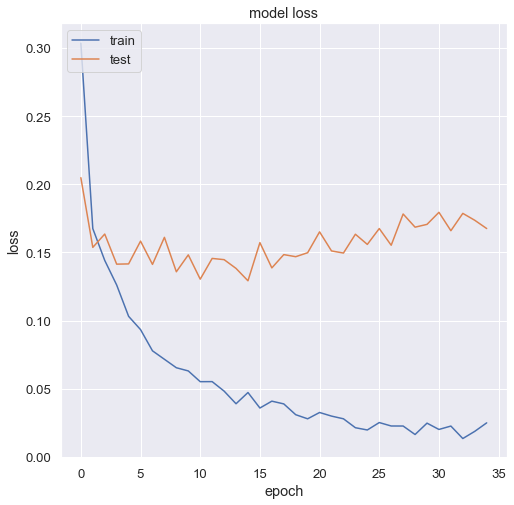

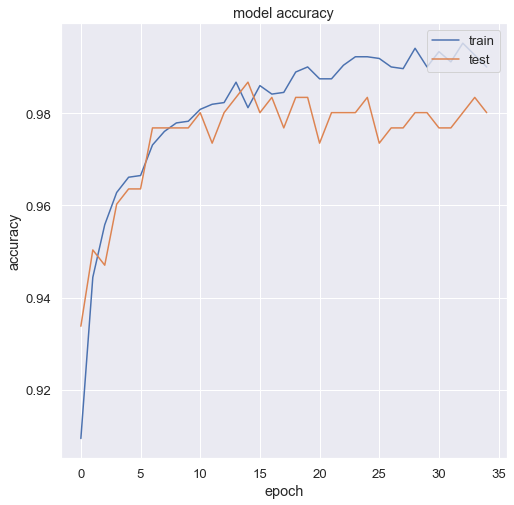

In [141]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

# # summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [142]:
model.save('model.h5')


In [143]:
import joblib


In [144]:
joblib.dump(sc, 'scaler.pkl')


['scaler.pkl']

In [145]:
sc = joblib.load('scaler.pkl')


In [147]:
from tensorflow.keras.models import load_model
model = load_model('model.h5')
model.predict(sc.transform([[42.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,132,1.00,1.00,109.0,1.0,0.88,.100,110.00,0.00,0,1]]))

array([[0.]], dtype=float32)